In [176]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import gym
import pickle
import glob
import re

re_alpha = re.compile('.+alpha-(\d\.\d)')
re_lambda = re.compile('.+lambda_-(\d\.\d)')
re_lambda = re.compile('.+lambda_-(\d\.\d)')

re_algo = re.compile('.+alg\-([a-z]+)\_$')

%matplotlib inline


def moving_average(data, step):
    N = len(data) - step
    res = np.zeros(N)
    for i in range(N):
        res[i] = np.mean(data[i:i+step])
    return res

def plot_grid_search(list_dirnames):
    plt.figure(figsize=(10,10))
    stats = []
    n = 100000
    highest_mean = -10
    highest_dir = ''
    for d in list_dirnames:
        if os.path.exists(d + "/episode_lengths.p"):
            stats.append(pickle.load(open(d + "/episode_lengths.p", "rb")))
            td_err = pickle.load(open(d + "/td_errors.p", "rb"))
                
            mean = moving_average(stats[-1].mean(axis=0)[:n], 300)
            if mean.mean() > highest_mean:
                highest_mean = mean.mean()
                highest_dir = d
                
            plt.plot(mean, alpha=0.5, label=d)
            std = stats[-1].var(axis=0)[:n]
            #plt.fill_between(range(mean.shape[0]), mean-std, mean+std,
            #            alpha=0.2, edgecolor='black', facecolor='b',
            #            linewidth=1, linestyle='dashdot', antialiased=True)
    plt.title('Smoothed average over 5 runs across episodes with different hyperparameters.')
    plt.xlabel('Episode')
    plt.ylabel('Smoothed average of episode duration over 5 runs')
    plt.legend()
    plt.show()
    """
    plt.figure(figsize=(10,10))
    print highest_mean, highest_dir
    
    for d in list_dirnames:
        if os.path.exists(d + "/episode_lengths.p"):
            td_err = pickle.load(open(d + "/td_errors.p", "rb"))
                
            mean = moving_average(stats[-1].mean(axis=0)[:n], 100)
            plt.plot(td_err.mean(axis=0)[:n], alpha=0.5, label=d)
    plt.legend()
    plt.show()
    """
    plt.figure(figsize=(10,10))

    lengths = pickle.load(open(highest_dir + "/episode_lengths.p", "rb"))
    for i, data in enumerate(lengths):
        plt.plot(moving_average(data, 300), alpha=0.5, label="run "+str(i))
    plt.title('5 smoothed mean across episodes' + highest_dir)
    plt.xlabel('Episode')
    plt.ylabel('Smoothed episode duration')

    plt.legend()
    plt.show()



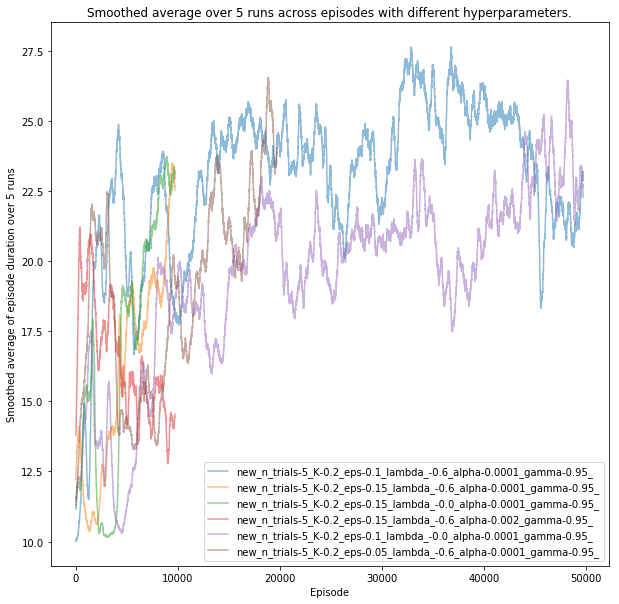

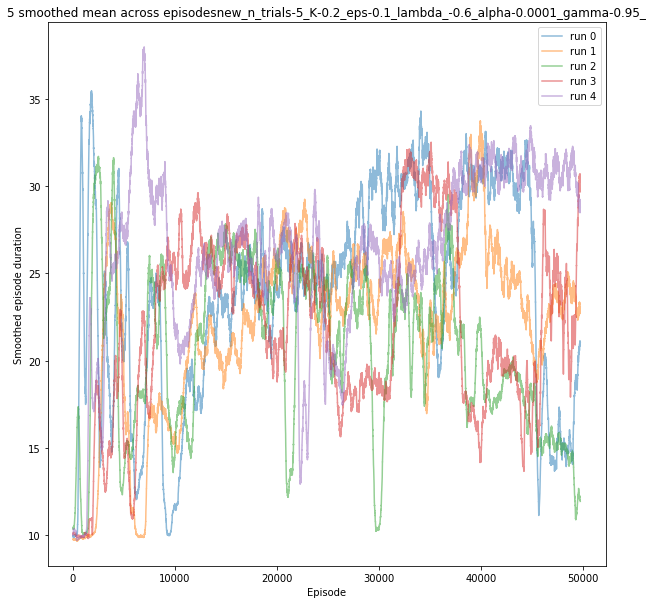

In [177]:
list_dir = glob.glob('new*')
plot_grid_search(list_dir)
